In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Loading the Titanic dataset
titanic_info = pd.read_csv('Titanic-Dataset.csv')
print(titanic_info.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
#general information
print("Dataset info:")
print(titanic_info.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Checking for missing values in each column

missing_data = titanic_info.isnull().sum()
print(f"Missing values in each column:\n{missing_data}")

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


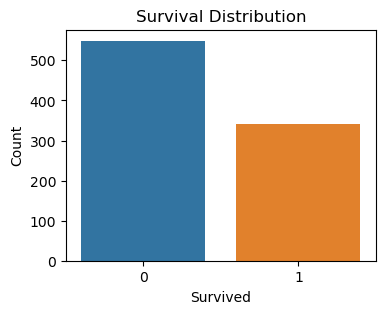

In [11]:
# Visualizing the distribution of the target variable named 'Survived'
plt.figure(figsize=(4, 3))
sns.countplot(x='Survived', data=titanic_info)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



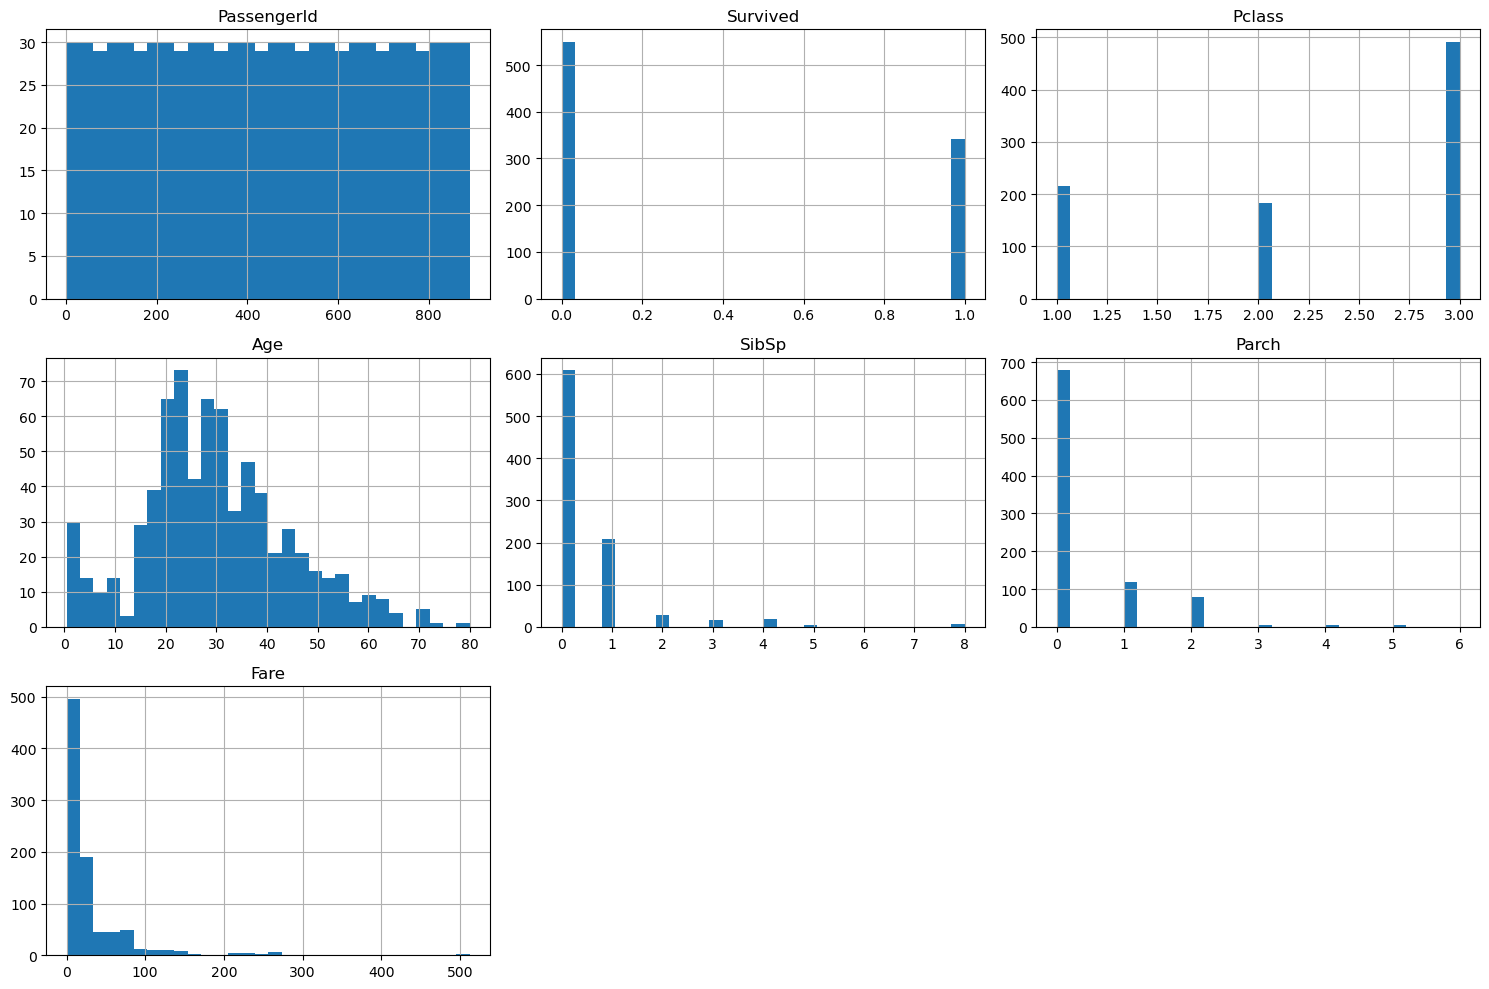

In [13]:
#plotting histogram for numerical features
titanic_info.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [15]:
# Handling missing values
# For 'Age', i wilbe using the median value

titanic_info['Age'].fillna(titanic_info['Age'].median(), inplace=True)


In [16]:
# For 'Embarked', i will use the most common value

titanic_info['Embarked'].fillna(titanic_info['Embarked'].mode()[0], inplace=True)


In [26]:
#Check and drop 'Cabin' if it exists

if 'Cabin' in titanic_info.columns:
    print("Dropping 'Cabin' column.")
    titanic_info.drop(columns='Cabin', inplace=True)
else:
    print("'Cabin' column not found in the dataset.")



# Converting categorical variables to numerical using LabelEncoder

le = LabelEncoder()
titanic_info['Sex'] = le.fit_transform(titanic_info['Sex'])
titanic_info['Embarked'] = le.fit_transform(titanic_info['Embarked'])


print("Data after preprocessing:")
print(titanic_info.head())



'Cabin' column not found in the dataset.
Data after preprocessing:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.

In [28]:
# Feature Engineering
# Adding a new feature 'FamilySize'

titanic_info['FamilySize'] = titanic_info['SibSp'] + titanic_info['Parch'] + 1

# Create a new feature 'IsAlone'
# If there's more than 1 in FamilySize, they're not alone
titanic_info['IsAlone'] = 1  # Assuming everyone is alone
titanic_info.loc[titanic_info['FamilySize'] > 1, 'IsAlone'] = 0  # Correct assumption for those not alone



In [29]:
# Dropping columns that won't be used for prediction
# Dropping 'Name', 'Ticket', 'SibSp', 'Parch' - they won't help my model
titanic_info.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

print("Data after feature engineering:")
print(titanic_info.head())


Data after feature engineering:
   PassengerId  Survived  Pclass  Sex   Age     Fare  Embarked  FamilySize  \
0            1         0       3    1  22.0   7.2500         2           2   
1            2         1       1    0  38.0  71.2833         0           2   
2            3         1       3    0  26.0   7.9250         2           1   
3            4         1       1    0  35.0  53.1000         2           2   
4            5         0       3    1  35.0   8.0500         2           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [30]:
# Model Building
# Separating features and target variable

features = titanic_info.drop(columns='Survived')
target = titanic_info['Survived']

# Splitting the data into training and testing sets
# Time to train-test split! Always good practice to set a random state.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing the RandomForestClassifier
# Going with a trusty Random Forest here
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
# Predictions on the test set

y_pred = rfc_model.predict(x_test)

# Evaluating the model
# Moment of truth - let's check the accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
co_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{co_matrix}')
print(f'Classification Report:\n{report}')

Accuracy: 0.83
Confusion Matrix:
[[93 12]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

